In [2]:
from io import IncrementalNewlineDecoder
from ast import increment_lineno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
%matplotlib inline
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('/content/diabities (1).csv')
print("Size of the dataset:",df.shape)
df.head()

Size of the dataset: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: xlabel='Outcome', ylabel='count'>

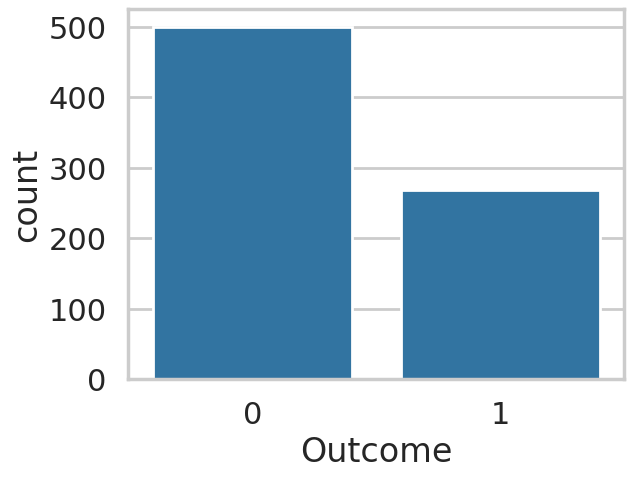

In [22]:
sns.countplot(x='Outcome',data=df)

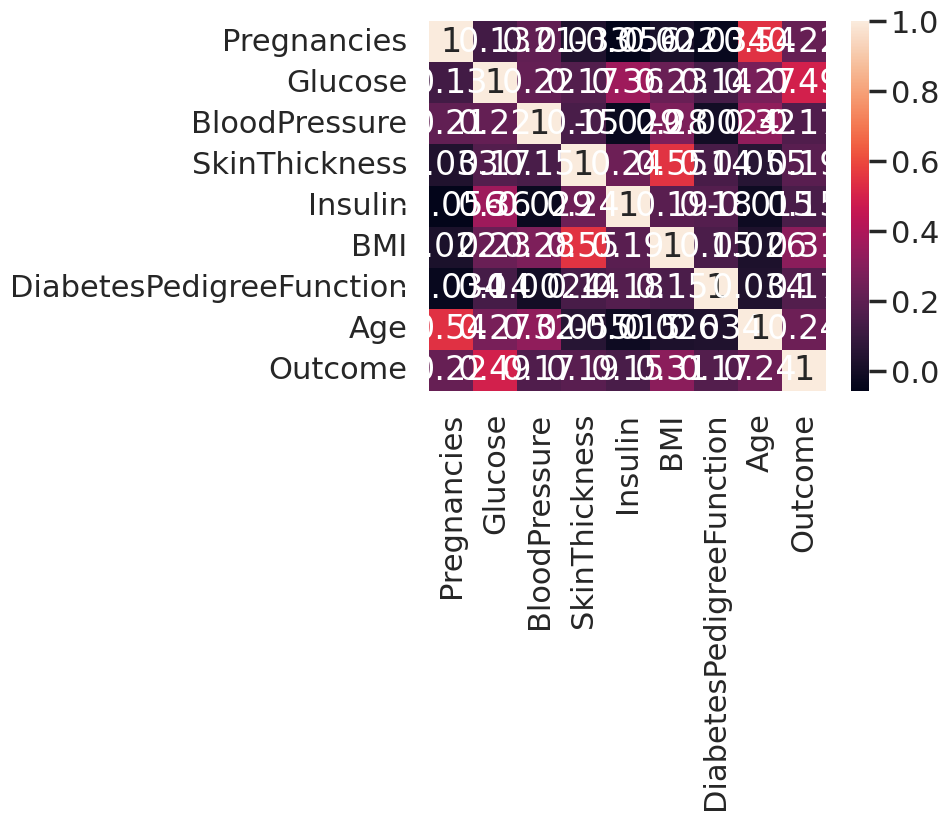

In [23]:
#correlation matrix
corr_mat = df.corr()
sns.heatmap(corr_mat,annot = True)
plt.show()

In [24]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [25]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [26]:
x[0]

array([  6.   , 148.   ,  72.   ,  35.   ,  30.5  ,  33.6  ,   0.627,
        50.   ])

In [9]:
print("---Count zero values per column---")
for col in ["Glucose","BloodPressure","SkinThickness","BMI"]:
  print("{}: {}".format(col,df[col].value_counts()[0]))
print("\n---Rows with zeros values in %---")
print("% of rows with zero values in all coloumns listed above:",
      (df[(df["Glucose"]==0) | (df["BloodPressure"]==0) |
          (df["BMI"]==0) | (df["SkinThickness"]==0)].shape[0] / df.shape[0]) *100)
print("% of rows with zero values in coloumns 'Glucose', 'BloodPressure' and 'BMI':",
      (df[(df["Glucose"]==0) | (df["BloodPressure"]==0) |
          (df["BMI"]==0) | (df["SkinThickness"]==0)].shape[0] / df.shape[0]) *100)

---Count zero values per column---
Glucose: 5
BloodPressure: 35
SkinThickness: 227
BMI: 11

---Rows with zeros values in %---
% of rows with zero values in all coloumns listed above: 30.729166666666668
% of rows with zero values in coloumns 'Glucose', 'BloodPressure' and 'BMI': 30.729166666666668


In [ ]:
df_rem = df [ (df["Glucose"]!=0) & (df["BloodPressure"]!=0) & (df["BMI"]!=0) ]
print("Size of dataframe:",df_rem.shape)
df_rem.head()

Size of dataframe: (724, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
X = df.drop('Outcome', axis=1)  # assuming 'Outcome' is the target variable
y = df['Outcome']

# Handle missing values if any (e.g., using mean imputation)
X.fillna(X.mean(), inplace=True)

# Normalize/standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [13]:
# Choose a model (e.g., Logistic Regression)
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7532467532467533
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

Confusion Matrix:
[[79 20]
 [18 37]]


In [15]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
print('Best parameters:', grid_search.best_params_)

# Evaluate the model with the best parameters
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Accuracy with best parameters: {accuracy_best}')


Best parameters: {'C': 10, 'solver': 'liblinear'}
Accuracy with best parameters: 0.7532467532467533


In [21]:

# Splitting the data into features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
log_reg_pred = log_reg.predict(X_test_scaled)
print("Logistic Regression Report:")
print(classification_report(y_test, log_reg_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, log_reg_pred))

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
gnb_pred = gnb.predict(X_test_scaled)
print("Gaussian Naive Bayes Report:")
print(classification_report(y_test, gnb_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, gnb_pred))

# Save the trained models
with open('/content/log_reg_model.pkl', 'wb') as file:
    pickle.dump(log_reg, file)
with open('/content/gnb_model.pkl', 'wb') as file:
    pickle.dump(gnb, file)
with open('/content/scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154

Confusion Matrix:
[[82 17]
 [19 36]]
Gaussian Naive Bayes Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80        99
           1       0.64      0.69      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154

Confusion Matrix:
[[78 21]
 [17 38]]


<Axes: >

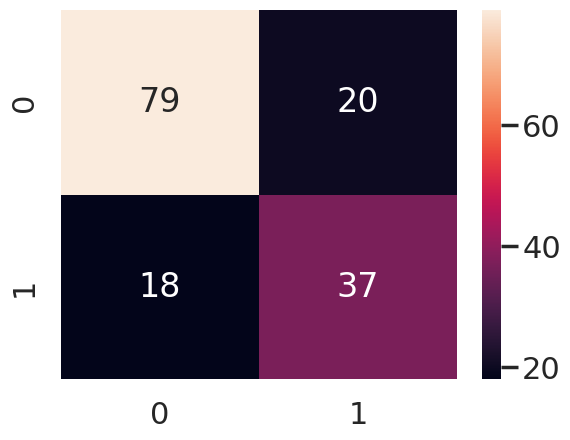

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot =True)

In [32]:
#saving the classifier model
import pickle
pickle.dump(log_reg,open('classifier.pkl','wb'))

In [33]:
pickle.dump(scaler, open('sc.pkl','wb'))